<a href="https://colab.research.google.com/github/Young-Won-Kim/snails2/blob/main/20210208_sine_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [325]:
#import libraries (numpy, pyplot, random)
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import find_peaks

In [326]:
#generating time data using arage function from numpy
time = np.arange(-10, 10, 0.01)

In [327]:
# finding x-amplitude at each time with specific wave
rd_a = random.sample(range(1,10),1)
rd_b = random.sample(range(1,10),1)
rd_c = random.sample(range(1,10),1)
rd_d = random.sample(range(1,10),1)
rd_e = random.sample(range(1,10),1)
rd_f = random.sample(range(1,10),1)

coef = rd_a+rd_c+rd_e
sumco = sum(coef)

x = ((rd_a*np.sin(rd_b*time) + rd_c*np.sin(rd_d*time) + rd_e*np.sin(rd_f*time)) / sumco ) + np.random.normal(0,0.1,len(time))

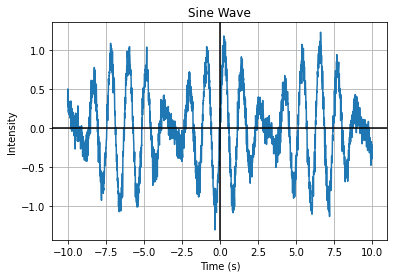

In [328]:
#plotting and setting labels from pyplot
plt.plot(time, amplitude)
plt.title('Sine Wave', color='k')
plt.xlabel('Time (s)')
plt.ylabel('Intensity')
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

In [329]:
#FFT
from scipy.fft import fft, fftfreq
# Number of sample points
N = 100
# sample spacing
T = 1/N
yf = fft(x)
xf = fftfreq(N, T)[0:N//2] #[0:N//2] = should contain the positive-frequency terms



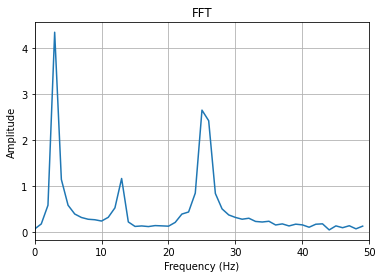

Maximum peak is ( 3.0 , 4.34 )
Minimum peak is ( 13.0 , 1.16 )


In [332]:
#Find peaks
peaks = find_peaks(1/N * np.abs(yf[0:N//2]),height = 0.1, threshold = 0.1, distance = 1)
height = peaks[1]['peak_heights']
peak_x = xf[peaks[0]] #Find x values of peaks
peak_y = np.round(np.interp(peak_x,xf,1/N * np.abs(yf[0:N//2])),2) #Find y values of peaks

#Find index of y values of peaks
index_max_y = np.argmax(peak_y)
index_min_y = np.argmin(peak_y)

#Make array
arr=np.vstack((peak_x,peak_y)) #x,y values of peaks

#Extract max/min value 
maxpeakx = arr[0,index_max_y]
maxpeaky = arr[1,index_max_y]
minpeakx = arr[0,index_min_y]
minpeaky = arr[1,index_min_y]

#Plot
plt.plot(xf, 1/N * np.abs(yf[0:N//2])) 
plt.grid()
plt.title('FFT', color='k')
plt.xlim([0, 50])
plt.xlabel('Frequency (Hz)')
plt.ylabel('DFT Amplitude')
plt.show()

#What 'y-axis' at FFT graph mean?
'''
주파수 스펙트럼에서 Y축(amplitude)은 측정한 샘플링내에서
주기 신호로 반복된다고 가정할때
해당 주파수의 성분의 진폭에 비례한 값을 의미.
이때 비례의 의미는 에너지의 개념과 유사.
sampling 크기 안에서 해당 주파수 진폭의 평균값이 amplitude.
이산성(discreteness) -> DFT
주기성(periodicity) -> frequency


'''

print("Maximum peak is (",maxpeakx,",",maxpeaky,")")
print("Minimum peak is (",minpeakx,",",minpeaky,")")